In [1]:
%load_ext autoreload
%autoreload 0

In [2]:
%autoreload

In [3]:
import sys
sys.path.append('/pollard/home/bsmith/Projects/haplo-benchmark/include/StrainFacts')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from lib.pandas_util import idxwhere
import sfacts as sf
import numpy as np
import xarray as xr
import seaborn as sns
from scipy.spatial.distance import cdist
import lib.plot

In [102]:
sim2 = sf.World.load("data/sfacts_simulate-model_simplest_simulation-n500-g1000-s100-pi40-mu100-eps10-seed0.world.nc")
sim2.data

<xarray.Dataset>
Dimensions:        (allele: 2, position: 1000, sample: 500, strain: 100)
Coordinates:
  * sample         (sample) int64 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * position       (position) int64 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * strain         (strain) int64 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
  * allele         (allele) object 'alt' 'ref'
Data variables:
    p              (sample, position) float32 0.06145 0.9385 ... 0.2139 0.214
    mu             (sample) float32 10.0 10.0 10.0 10.0 ... 10.0 10.0 10.0 10.0
    epsilon        (sample) float32 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01 0.01
    m              (sample, position) float32 10.0 10.0 10.0 ... 10.0 10.0 10.0
    genotypes      (strain, position) float32 0.0 0.0 0.0 1.0 ... 0.0 0.0 0.0
    communities    (sample, strain) float32 1.175e-38 1.175e-38 ... 1.175e-38
    metagenotypes  (sample, position, allele) float32 0.0 10.0 10.0 ... 3.0 7.0
Attributes:
    pi_hyper:            0.4
    mu_hyper_mean:       10.0
    epsilon_hyper_mode:  0.01

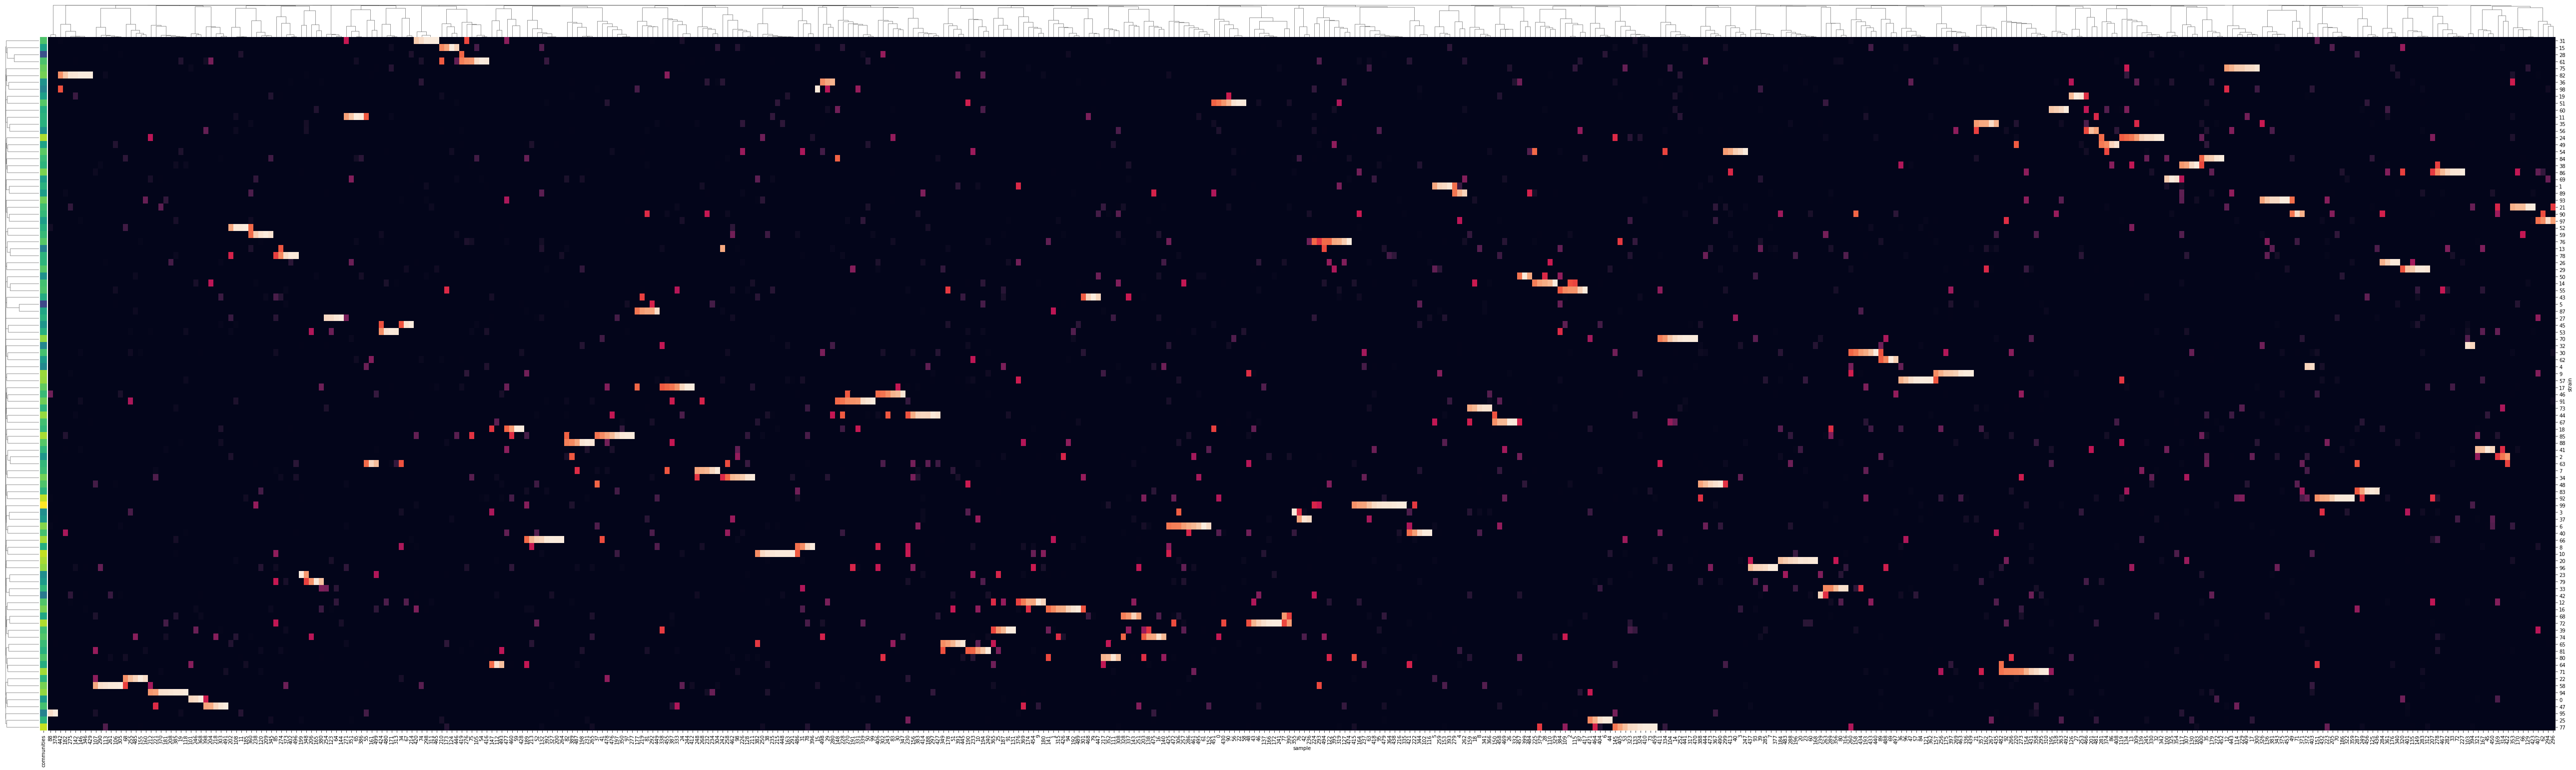

In [103]:
sf.plot.plot_community(sim2)

In [84]:
# data/sfacts_simulate-model_ssdd-n1000-g10000-s20-rho10-pi10-mu1-eps10-alpha100-seed0.metagenotype-n100-g500.fit-sfacts36_cpu-s40-g10000-seed0.benchmark
stem = 'data/sfacts_simulate-model_ssdd-n1000-g10000-s20-rho10-pi10-mu100-eps10-alpha100-seed0'
mgen_stem = 'metagenotype-n100-g50'
sim0 = sf.World.load(f'{stem}.world.nc')
mgen = sf.Metagenotypes.load(f'{stem}.{mgen_stem}.nc')

sim = sim0.sel(position=mgen.position, sample=mgen.sample)
fit_stem = 'fit-sfacts36_cpu-s40-g10000-seed0'
fit_init = sf.World.load(f'{stem}.{mgen_stem}.{fit_stem}.world_initial.nc')
fit = sf.World.load(f'{stem}.{mgen_stem}.{fit_stem}.world.nc')

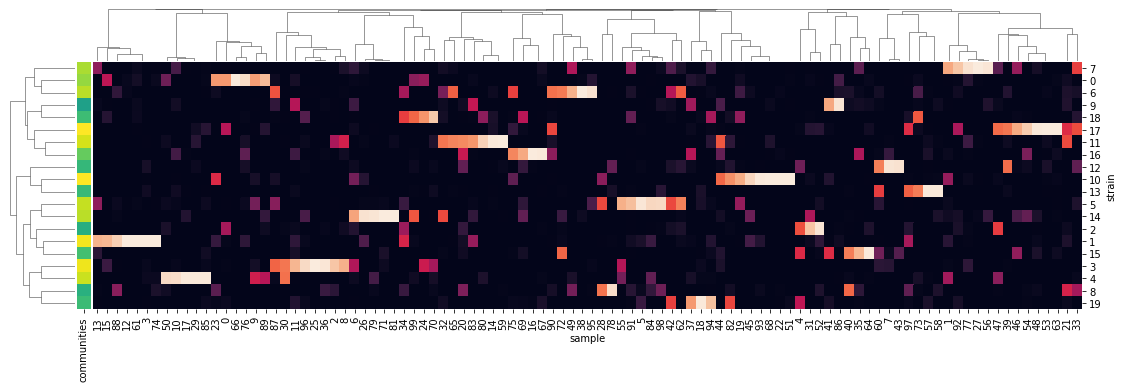

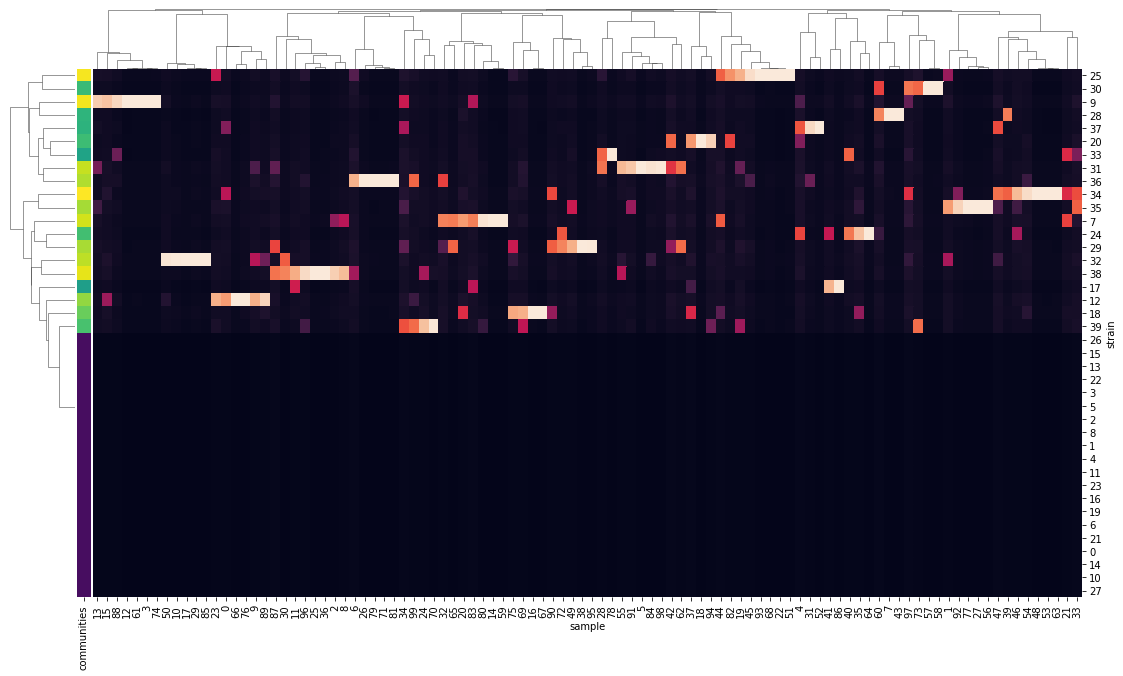

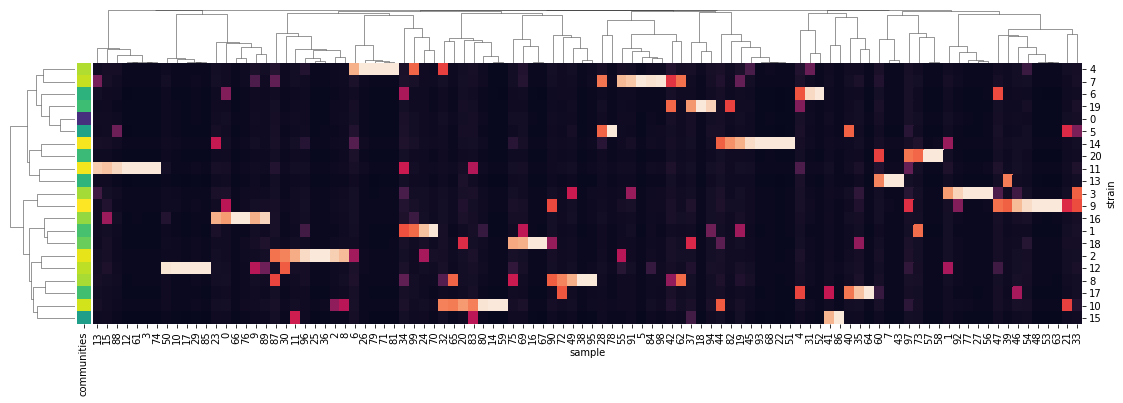

In [85]:
sf.plot.plot_community(sim, col_linkage_func=lambda w: sim.communities.linkage("sample"), row_linkage_func=lambda w: w.genotypes.linkage("strain"))
sf.plot.plot_community(fit_init, col_linkage_func=lambda w: sim.communities.linkage("sample"), row_linkage_func=lambda w: w.genotypes.linkage("strain"))
sf.plot.plot_community(fit, col_linkage_func=lambda w: sim.communities.linkage("sample"), row_linkage_func=lambda w: w.genotypes.linkage("strain"))

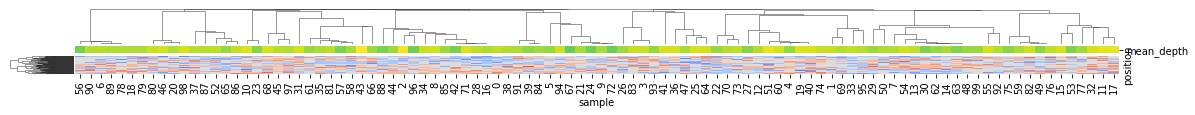

In [76]:
sf.plot.plot_metagenotype(sim, col_linkage_func=lambda w: sim.communities.linkage("sample"))

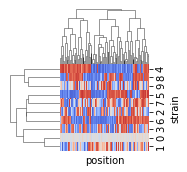

In [77]:
sf.plot.plot_genotype(fit)

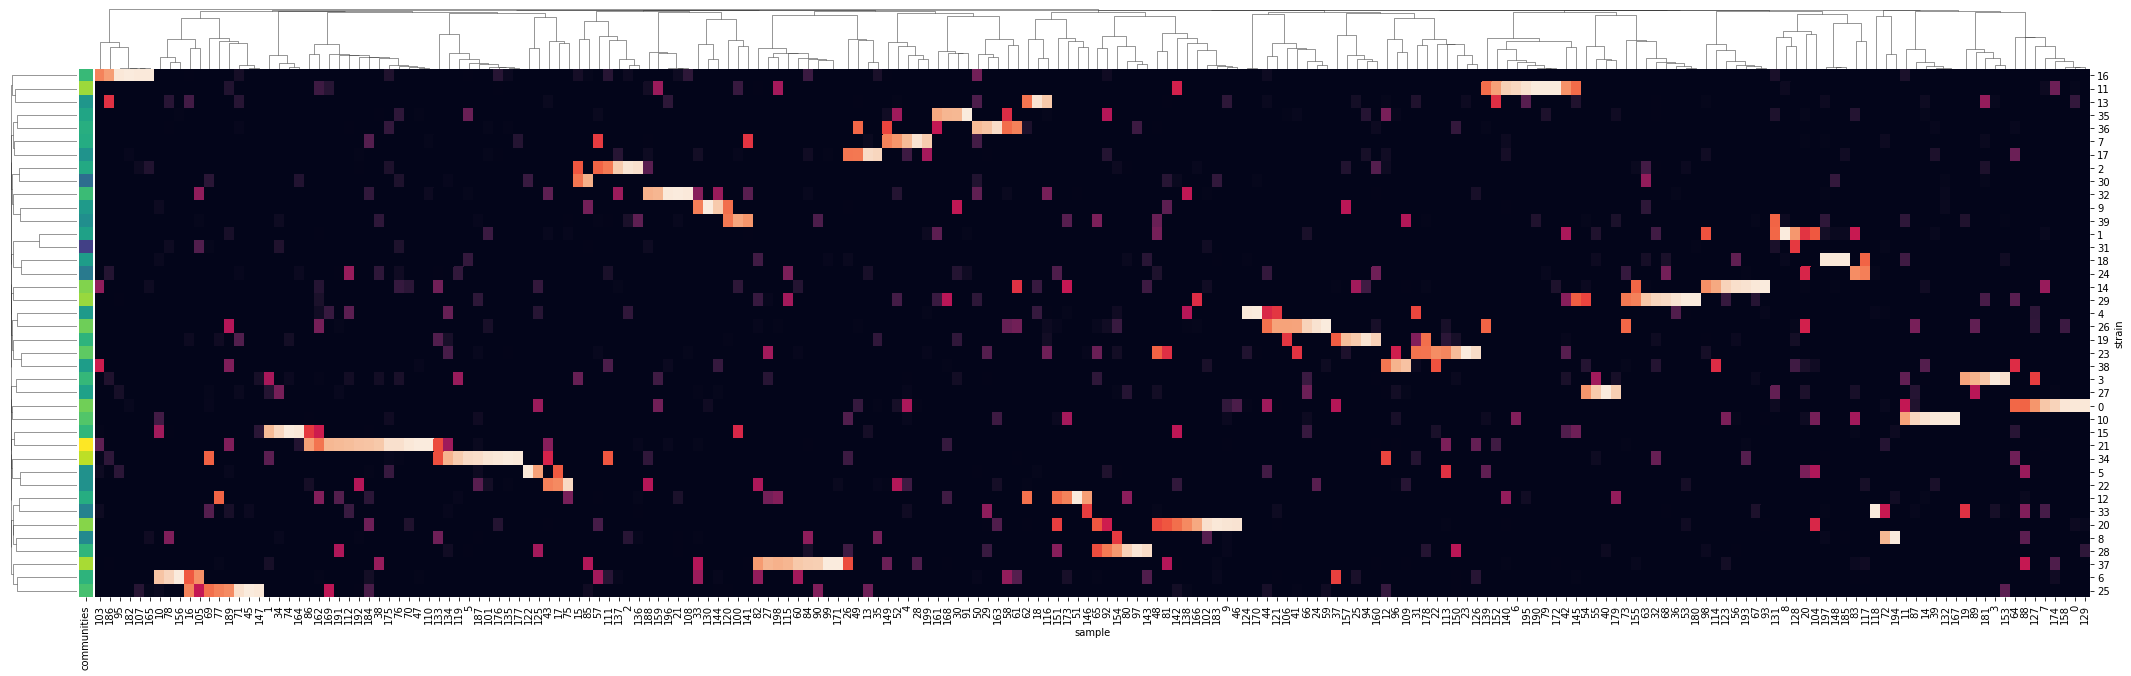

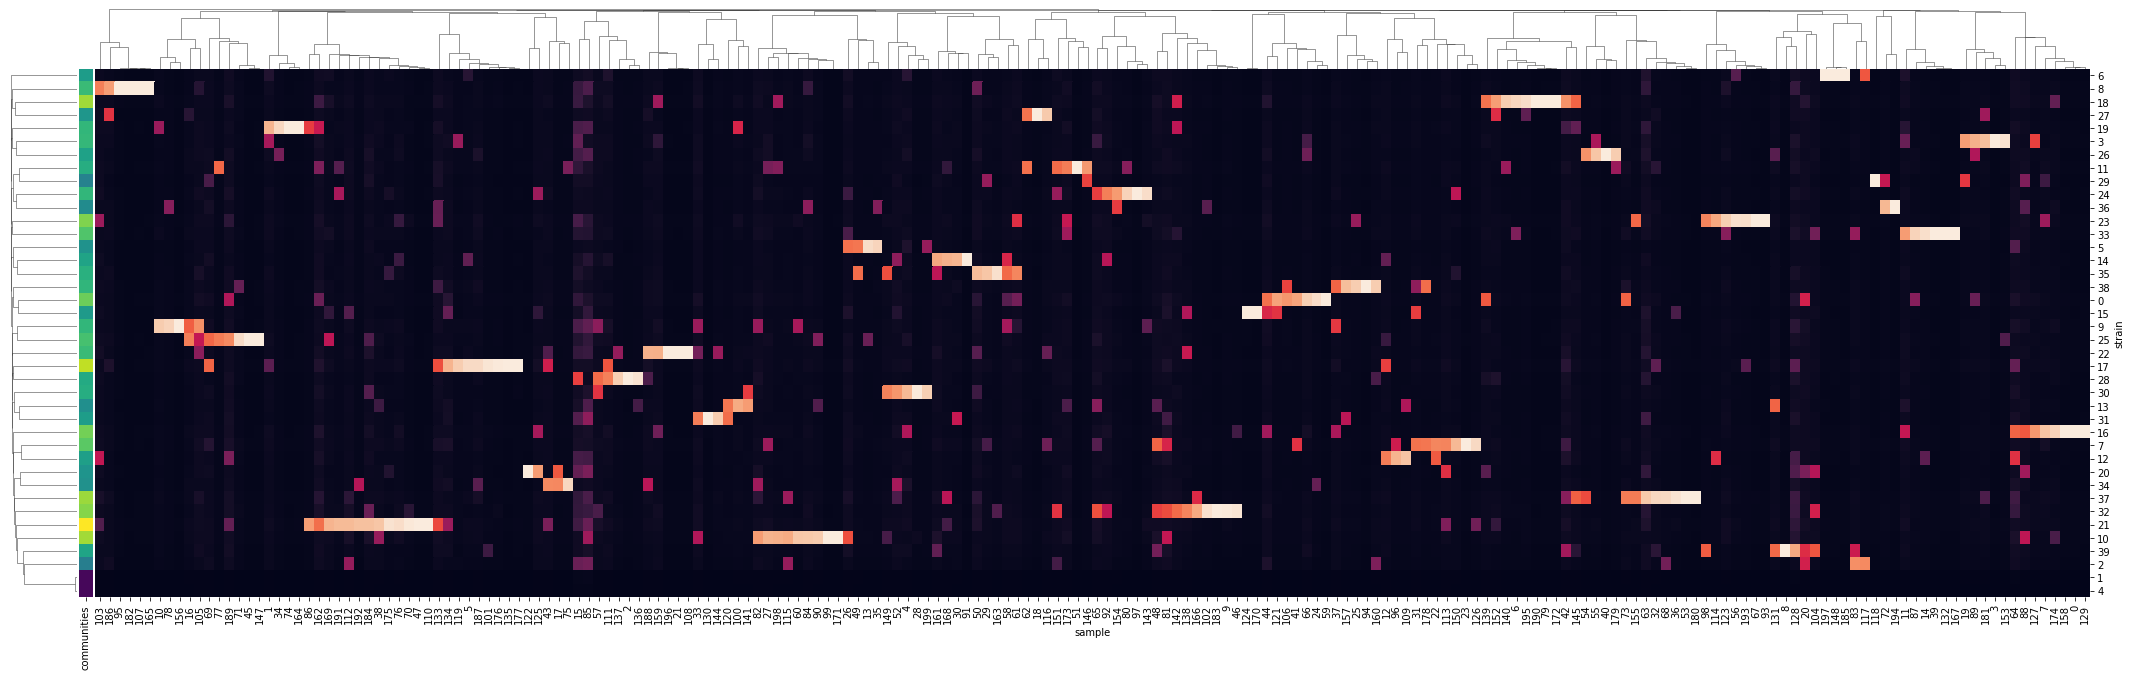

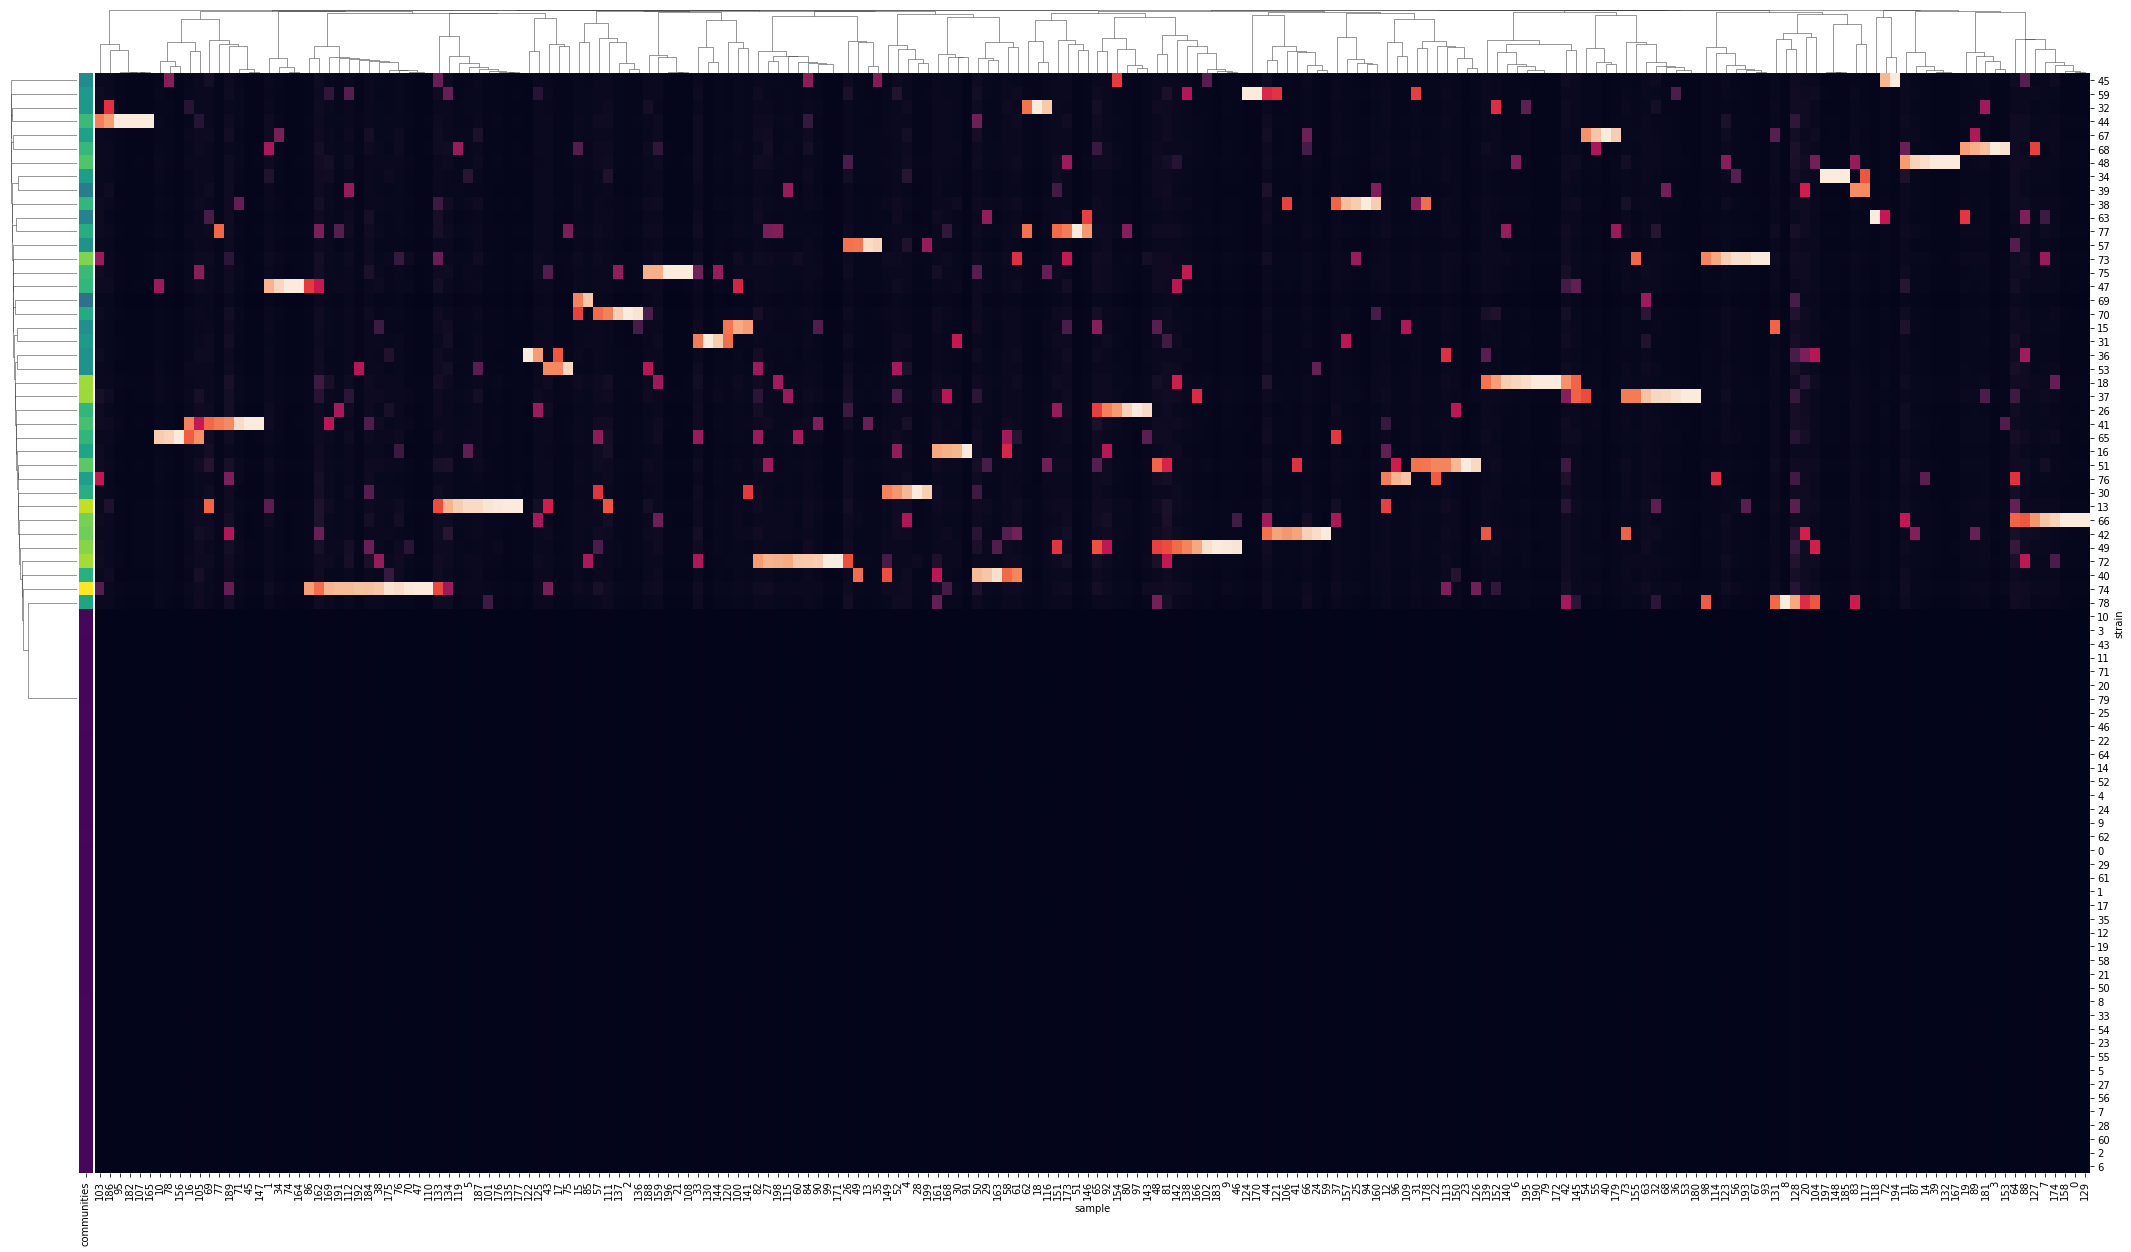

In [136]:
n = 200
g = 250

sim_s = round(n / 5)
sim_s_up = round(sim_s * 2)

sim_stem = f'data/sfacts_simulate-model_simplest_simulation-n{n}-g10000-s{sim_s}-pi40-mu100-eps10-seed0'

sim2 = sf.World.load(f"{sim_stem}.world.nc")

metagenotype_stem = f'{sim_stem}.metagenotype-n500-g{g}'
# fitA1 = sf.World.load(f"{metagenotype_stem}.fit-sfinder-s{sim_s}-seed0.world.nc")
# fitA2 = sf.World.load(f"{metagenotype_stem}.fit-sfinder-s{sim_s_up}-seed0.world.nc")
fitB1 = sf.World.load(f"{metagenotype_stem}.fit-sfacts40_cpu-s{sim_s}-seed0.world.nc")
fitB2 = sf.World.load(f"{metagenotype_stem}.fit-sfacts40_cpu-s{sim_s_up}-seed0.world.nc")


sf.plot.plot_community(sim2, col_linkage_func=lambda w: sim2.communities.linkage("sample"))
# sf.plot.plot_community(fitA1, col_linkage_func=lambda w: sim2.communities.linkage("sample"))
sf.plot.plot_community(fitB1, col_linkage_func=lambda w: sim2.communities.linkage("sample"))
# sf.plot.plot_community(fitA2, col_linkage_func=lambda w: sim2.communities.linkage("sample"))
sf.plot.plot_community(fitB2, col_linkage_func=lambda w: sim2.communities.linkage("sample"))